# 12.05 HTTP test

In [ ]:
import requests #Import HTTPS client package

In [2]:
# tiff path
tiff_path = "/media/ibrahim/Extended Storage/cloud/Internship/shapiro/cell_tinder/exemplar-001_Ch1_DAPI (1).tif"

In [3]:
# Feed tiff path to server
content = {"path": tiff_path}
endpoint = "http://127.0.0.1:5000//v1//tiff_img"

try: 
    requests.post(endpoint, data=content)
    print("Successfully sent data")
except Exception as e:
    print("Got the following problem here: {}".format(e))

Got the following problem here: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: //v1//tiff_img (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x764cfd75a850>: Failed to establish a new connection: [Errno 111] Connection refused'))


In [4]:
# Recieve processed data from server
endpoint = "http://127.0.0.1:5000//v1//tiff_img"

try: 
    data = requests.get(endpoint)
    print("Successfully Recieved data")
except Exception as e:
    print("Got the following problem here: {}".format(e))

Got the following problem here: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: //v1//tiff_img (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x764cfd7614d0>: Failed to establish a new connection: [Errno 111] Connection refused'))


In [5]:
# Display recieved data

import matplotlib.pyplot as plt
import numpy as np

data = data.json()
# Problems showing rgb data with plt, so use grayscale channel
plt.imshow(np.array(data["img"])[...,-1])
print("Shape and dtype of image: {} and {}".format(data["shape"], data["dtype"]))

NameError: name 'data' is not defined

# Check Flatten operation to confirm order of 

In [2]:
import numpy as np

array = np.array([[[1,2,3,4,5], [3,3,3,3,3]], [[4,4,4,4,4], [5,5,5,5,5]], [[6,6,6,6,6], [7,7,7,7,7]]])

print(array.flatten())

[1 2 3 4 5 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7 7 7 7]


In [9]:
import python_codes.unity_functions as uf

img = uf.fluorescent_channel2rgb("C:\Schapiro Lab\ibrahim_hiwi\VRproject\VR Demo dataset\image_45.tif")

print(img[0].shape)

(34, 2048, 2048)


In [14]:
import matplotlib.pyplot as plt

In [15]:
img_c1 = (img[0][:3]).astype(np.uint16)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


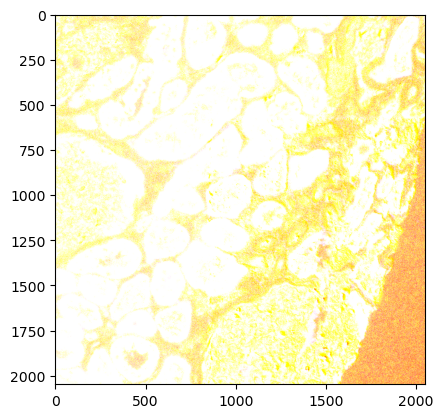

In [19]:
plt.imshow()